# Projeto ICD: 

- Ana Paula Cardoso de Castro Kendall
- Francelino Teotonio Júnior
- Vivianny Khatly Medeiros Pereira

## Introdução

### Motivação

netflix eh legal mt gente conhece e usa, etc

### Objetivos da análise

Descobrir o quanto as preferencias dos usuarios influenciam nas tendencias dos filmes e tals.

## Dados usados

### Datasets

#### [Netflix TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv)

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

#### [Netflix daily top 10](https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us)

Daily Netflix Top 10 Movie/TV Show in the United States from 2020 - Mar 2022.

#### [Netflix Stock Price Data set 2002-2022](https://www.kaggle.com/datasets/meetnagadia/netflix-stock-price-data-set-20022022/versions/2?resource=download)

This is a Data set for Stock Price of Netflix .
This Data set start from 2002 to 2022 .

## Pré-processamento

Importar bibiliotecas necessárias

In [89]:
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from io import StringIO
import csv

Carregar dataframes e remover dados desnecessarios

Netflix TV Shows and Movies:

In [90]:
catalog_df = pd.read_csv("catalog.csv")
#para a nossa analise, interessam somente os filmes
movies_df = catalog_df.loc[catalog_df.type == "MOVIE"]
#remover colunas desnecessarias
movies_df = movies_df[['title', 'runtime', 'imdb_score', 'imdb_votes','release_year']]


movies_df

,title,runtime,imdb_score,imdb_votes,release_year
1,Taxi Driver,114,8.2,808582.0,1976
2,Deliverance,109,7.7,107673.0,1972
3,Monty Python and the Holy Grail,91,8.2,534486.0,1975
4,The Dirty Dozen,150,7.7,72662.0,1967
6,Life of Brian,94,8.0,395024.0,1979
...,...,...,...,...,...
5844,Bling Empire - The Afterparty,35,NaN,NaN,2021
5845,Fine Wine,100,6.8,45.0,2021
5846,C/O Kaadhal,134,7.7,348.0,2021
5847,Lokillo,90,3.8,68.0,2021


Netflix daily top 10:

In [59]:
daily_top10_df = pd.read_csv("daily top 10.csv")
daily_top10_df = daily_top10_df[['As of', 'Viewership Score']]
daily_top10_df

,As of,Viewership Score
0,2020-04-01,90
1,2020-04-01,45
2,2020-04-01,76
3,2020-04-01,30
4,2020-04-01,55
...,...,...
7095,2022-03-11,81
7096,2022-03-11,100
7097,2022-03-11,7
7098,2022-03-11,33


Netflix Stock Price Data Set 2002-2022:

In [61]:
stocks_df = pd.read_csv("stocks.csv")
# Selecionar o periodo e as colunas relevantes do df
# Periodo = Datas que correspondem ao dataframe daily_top10_df
stocks = stocks_df[4495:4986]
stocks = stocks[['Date','Adj Close']]

'''Dado que os valores das ações não são registrados nos fins de semana, 
é necessario adicionar ao dataframe as datas omitidas, para que os 
valores correspondam com as datas do dataframe daily_top10_df.'''

# Preencher datas
stocks['Date'] =  pd.to_datetime(stocks['Date'], format='%Y/%m/%d')
stocks.set_index('Date', inplace=True)
stocks = stocks.resample('D').ffill().reset_index()
stocks

,Date,Adj Close
0,2020-04-01,364.079987
1,2020-04-02,370.079987
2,2020-04-03,361.760010
3,2020-04-04,361.760010
4,2020-04-05,361.760010
...,...,...
705,2022-03-07,350.260010
706,2022-03-08,341.760010
707,2022-03-09,358.790009
708,2022-03-10,356.769989


## Perguntas

### 1. Os espectadores preferem filmes curtos, longos ou de duração média?


In [68]:
movies_df[['runtime','imdb_score']].corr()

,runtime,imdb_score
runtime,1.000000,0.114065
imdb_score,0.114065,1.000000


2. Explorando agrupamentos

In [33]:
df_group1 = movies_df[['runtime', 'imdb_score']]
df_group1

,runtime,imdb_score
0,114,8.2
1,109,7.7
2,91,8.2
3,150,7.7
5,94,8.0
...,...,...
5362,25,5.6
5363,93,5.0
5364,100,6.8
5365,134,7.7


<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

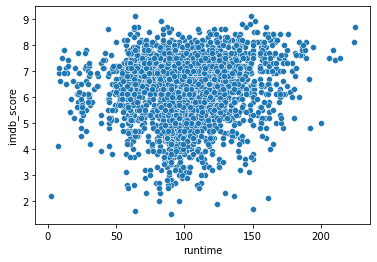

In [34]:
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score")

#### Aplicação do K-means:

Rodando o K-Means 1 vez:

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

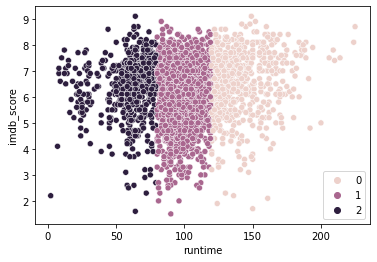

In [35]:
kmeans = KMeans(n_clusters=3, n_init=1).fit(df_group1)
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score", hue=kmeans.labels_)

Rodando o K-Means 100 vezes:

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

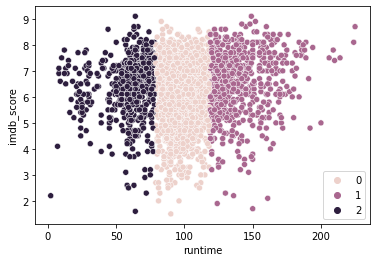

In [38]:
kmeans = KMeans(n_clusters=3,  n_init=100).fit(df_group1)
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score", hue=kmeans.labels_)

#### Conclusão:

Observa-se que os dados foram agrupados em fatias verticais ao longo do eixo x, determinadas quase que exclusivamente pelo tempo de duração de cada filme. Sendo assim, há em cada grupo a amplitude máxima de valores das notas de avaliação naquele intervalo.

Apesar de não haver grande diferença entre a primeira e a centésima iteração do algoritmo, observa-se o endireitamento das linhas de fronteira entre os grupos, que tendem a depender cada vez mais do tempo de duração.

Conclui-se, então, que na avaliação dos filmes não há influência do tempo de duração.

### 2. Os espectadores gostam de filmes antigos?

Para esta análise, serão considerados como antigos of filmes lançados antes do ano 2000.

Ao plotar o gráfico de dispersão das variáveis release_year e imdb_score, obtem-se:

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

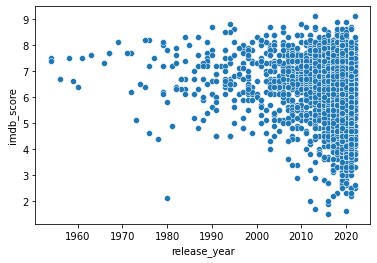

In [76]:
sns.scatterplot(data=movies_df, x="release_year", y="imdb_score")

In [79]:
print("Media: ", movies_df.imdb_score.mean())
print("Variancia: ", movies_df.imdb_score.var())

Media:  6.246748323126275
Variancia:  1.271224108460577


Pelos dados acima, observa-se que os filmes antigos recebem avaliações acima da média

In [92]:
votes_mean = movies_df.imdb_votes.mean()

In [95]:
old_movies = movies_df.loc[(movies_df.release_year <= 2000) & (movies_df.imdb_votes >= votes_mean)]

print("Filmes antigos:")
print("Media: ", old_movies.imdb_score.mean())
print("Variancia: ", old_movies.imdb_score.var())

Filmes antigos:
Media:  7.116393442622951
Variancia:  0.9740601092896174


In [97]:
new_movies = movies_df.loc[(movies_df.release_year > 2000)  & (movies_df.imdb_votes >= votes_mean)]

print("Filmes novos:")
print("Media: ", new_movies.imdb_score.mean())
print("Variancia: ", new_movies.imdb_score.var())

Filmes novos:
Media:  6.657815845824411
Variancia:  0.8757488673020191


In [77]:
movies_df[['release_year','imdb_score']].corr()

,release_year,imdb_score
release_year,1.000000,-0.178223
imdb_score,-0.178223,1.000000


### 3. A Netflix é mais valiosa quando o seu catálogo está bom?


Para fazer essa análise, serão comparados os níveis de audiência com os preços das ações da Netflix no período de 01/04/2020 a 11/03/2022. Para isso, são necessárias algumas manipulações com os dados.

#### Preparando os dados

Primeiramente, obteremos o nível de audiência diário por meio da média dos níveis de audiência dos 10 programas mais populares do dia. 

In [42]:
df_vscore = daily_top10_df[['Viewership Score']]
df_vscore = df_vscore.copy()

# obtendo as média diárias por meio da função np.mean()
vscores = np.array(df_vscore['Viewership Score'])
vscore_means = []

for i in range(int(len(df_vscore))):
    j = i*10
    if (j<len(df_vscore)):
        daily_mean= np.mean(vscores[j:j+10])
        vscore_means.append(daily_mean)

Então, cria-se um dataframe com os dados obtidos

In [47]:
df_group3 = stocks
df_group3['Viewrship Scores'] = vscore_means
df_group3 = df_group3[['Viewrship Scores','Adj Close']]
df_group3

,Viewrship Scores,Adj Close
0,38.1,364.079987
1,37.0,370.079987
2,35.3,361.760010
3,37.0,361.760010
4,42.1,361.760010
...,...,...
705,79.9,350.260010
706,96.4,341.760010
707,94.9,358.790009
708,101.9,356.769989


Com o gráfico de dispersão:

<AxesSubplot:xlabel='Adj Close', ylabel='Viewrship Scores'>

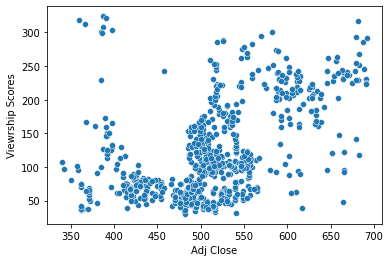

In [48]:
sns.scatterplot(data=df_group3, x="Adj Close", y="Viewrship Scores")

#### Aplicação do K-means:

Rodando o K-Means 1 vez:

<AxesSubplot:xlabel='Adj Close', ylabel='Viewrship Scores'>

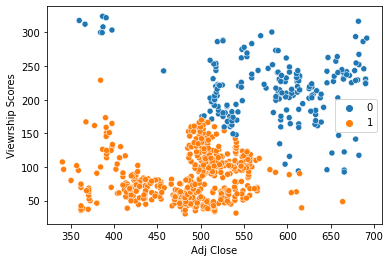

In [49]:
kmeans = KMeans(n_clusters=2, n_init=1).fit(df_group3)
sns.scatterplot(data=df_group3, x="Adj Close", y="Viewrship Scores", hue=kmeans.labels_)

Rodando o K-Means 100 vezes:

<AxesSubplot:xlabel='Adj Close', ylabel='Viewrship Scores'>

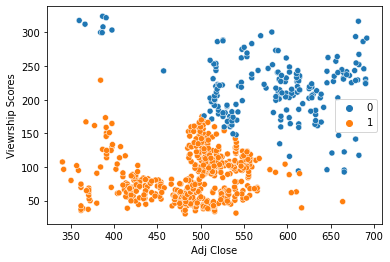

In [51]:
kmeans = KMeans(n_clusters=2, n_init=100).fit(df_group3)
sns.scatterplot(data=df_group3, x="Adj Close", y="Viewrship Scores", hue=kmeans.labels_)

Rodando o K-Means com K=3:

<AxesSubplot:xlabel='Adj Close', ylabel='Viewrship Scores'>

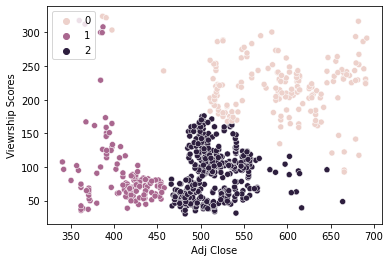

In [52]:
kmeans = KMeans(n_clusters=3, n_init=500).fit(df_group3)
sns.scatterplot(data=df_group3, x="Adj Close", y="Viewrship Scores", hue=kmeans.labels_)

### Conclusão:

Pelo agrupamento obtido quando K=2, observa-se polos nítidos que separam os pontos de baixa audiência e preços baixos dos pontos de alta adiência e preços altos, o que implicam uma tendência linear entre os valores dos níveis de audiência e dos preços das ações. Entretanto, os resultados obtidos com k=3 destacam o fato de que a maior densidade de pontos encontra-se na região central do eixo dos preços das ações, com valores de audiência baixos ou inferiores à média. Isso indica a existência de fatores externos que influenciam nos preços das ações. 

Conclui-se então que os valores das ações são sim influenciados pelos níveis de audiência, apesar de não dependerem somente deles.

In [78]:
df_group3[['Adj Close','Viewrship Scores']].corr()

,Adj Close,Viewrship Scores
Adj Close,1.000000,0.484248
Viewrship Scores,0.484248,1.000000


## Conclusão